#**Shock Front Classification**

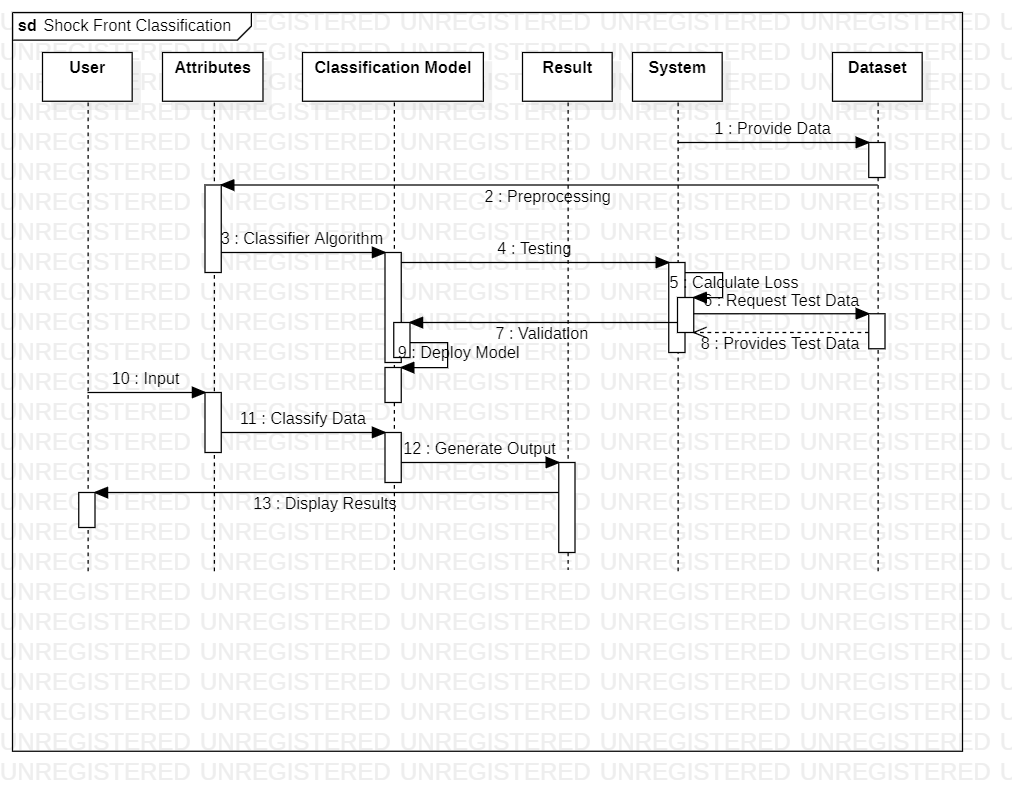

## Generating Data

In [ ]:
import pandas as pd
import uuid
import numpy as np
import random

In [ ]:
num_values = 12000

# A list of 8 features
features = [
    "id",
    "pressure",
    "temperature",
    "density",
    "shock angle",
    "wedge angle",
    "velocity",
    "mach",
]

In [ ]:
# Creating a DF for these features
df = pd.DataFrame(columns=features)

In [ ]:
df['id'] = [uuid.uuid4().hex for i in range(num_values)]
df['id'].nunique()==num_values
df['id'].head(10)

0    eb1228f1dde140a18e2523388400cdb8
1    13d432a8df5341f0934f91988d848411
2    67f79dc3a3e14846a4ecd9126f422a66
3    3411e5688a8342068c8d56fd0c102d56
4    bf3a42892fd947a5a62b6c1fe1d11320
5    f637f78051724a978d704016db312c7b
6    6b757eb4328e4a56bd69de3548fe00f3
7    d9742ac5ceac47f99ba916b8fc557293
8    8c2b7aba731a4effa9c25945426b54f3
9    6f5593aa0aec4b80b2351ab5ad0e2e63
Name: id, dtype: object

In [ ]:
p = [random.randrange(10,100) for i in range(num_values)]
df['pressure'] = [x/10 for x in p] # Pressure taken in MPa
df['pressure'].head(10)

0    3.8
1    5.9
2    5.5
3    2.5
4    9.2
5    2.0
6    8.5
7    7.3
8    2.3
9    1.8
Name: pressure, dtype: float64

In [ ]:
t = [random.randrange(1000,10000) for i in range(num_values)]
df['temperature'] = [x/10 for x in t] # Temperature taken in K
df['temperature'].head(10)

0    458.6
1    984.3
2    574.1
3    316.9
4    885.5
5    456.9
6    705.5
7    685.1
8    491.6
9    432.5
Name: temperature, dtype: float64

In [ ]:
d = [random.randrange(1,100) for i in range(num_values)]
df['density'] = [x/10 for x in d] # Density taken in kg/m3
df['density'].head(10)

0    6.2
1    3.6
2    0.7
3    7.5
4    5.4
5    6.4
6    4.6
7    7.9
8    9.0
9    5.7
Name: density, dtype: float64

In [ ]:
sa = [random.randrange(0,180) for i in range(num_values)]
df['shock angle'] = [x/10 for x in sa] # Shock angle in degrees
df['shock angle'].head(10)

0    11.8
1    14.3
2    15.9
3     3.4
4     7.6
5    11.4
6     1.3
7     9.9
8     0.5
9     4.3
Name: shock angle, dtype: float64

In [ ]:
wa = [random.randrange(0,180) for i in range(num_values)]
df['wedge angle'] = [x/10 for x in wa] # Wedge angle in degrees
df['wedge angle'].head(10)

0    17.0
1     5.1
2     1.9
3     8.0
4    10.0
5     3.8
6     1.9
7    12.3
8     9.3
9     2.7
Name: wedge angle, dtype: float64

In [ ]:
v = [random.randrange(332,7000) for i in range(num_values)]
df['velocity'] = [x/10 for x in v] # Velocity in m/s
df['velocity'].head(10)

0    562.5
1    615.7
2     67.2
3    587.5
4     41.4
5    407.5
6    423.0
7     44.5
8    144.2
9    579.1
Name: velocity, dtype: float64

In [ ]:
df['mach'] = df['velocity']/331.29 # Mach no. ratio of speed of shockwave to the speed of sound in the medium i.e. air
df['mach'].head(10)

0    1.697908
1    1.858493
2    0.202843
3    1.773371
4    0.124966
5    1.230040
6    1.276827
7    0.134323
8    0.435268
9    1.748015
Name: mach, dtype: float64

###Clustering to get Target Data i.e. types of Shock Waves

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           12000 non-null  object 
 1   pressure     12000 non-null  float64
 2   temperature  12000 non-null  float64
 3   density      12000 non-null  float64
 4   shock angle  12000 non-null  float64
 5   wedge angle  12000 non-null  float64
 6   velocity     12000 non-null  float64
 7   mach         12000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 750.1+ KB


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=48)
kmeans.fit(df.drop(['id'], axis = 1))

KMeans(n_clusters=3, random_state=48)

In [ ]:
df['type'] = kmeans.labels_

In [ ]:
dictionary = {0:'oblique shock wave',
              1:'reflected oblique or bow shock waves',
              2: 'impinging normal shock wave'}

In [ ]:
df['type'].replace(dictionary, inplace = True)

In [ ]:
df.head()

,id,pressure,temperature,density,shock angle,wedge angle,velocity,mach,type
0,eb1228f1dde140a18e2523388400cdb8,3.8,458.6,6.2,11.8,17.0,562.5,1.697908,reflected oblique or bow shock waves
1,13d432a8df5341f0934f91988d848411,5.9,984.3,3.6,14.3,5.1,615.7,1.858493,oblique shock wave
2,67f79dc3a3e14846a4ecd9126f422a66,5.5,574.1,0.7,15.9,1.9,67.2,0.202843,impinging normal shock wave
3,3411e5688a8342068c8d56fd0c102d56,2.5,316.9,7.5,3.4,8.0,587.5,1.773371,reflected oblique or bow shock waves
4,bf3a42892fd947a5a62b6c1fe1d11320,9.2,885.5,5.4,7.6,10.0,41.4,0.124966,impinging normal shock wave


Saving in .csv format

In [ ]:
df.to_csv('shock_front_data.csv')

## Data Visualization

In [ ]:
df.describe()

,pressure,temperature,density,shock angle,wedge angle,velocity,mach
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5.462142,553.834875,5.026775,8.956133,8.896392,367.986250,1.110768
std,2.613028,259.524499,2.861120,5.178644,5.249283,192.612447,0.581401
min,1.000000,100.000000,0.100000,0.000000,0.000000,33.200000,0.100214
25%,3.200000,328.500000,2.500000,4.500000,4.300000,199.800000,0.603097
50%,5.500000,558.250000,5.100000,8.900000,8.900000,369.300000,1.114733
75%,7.700000,777.425000,7.500000,13.400000,13.400000,532.825000,1.608334
max,9.900000,999.900000,9.900000,17.900000,17.900000,699.900000,2.112651


In [ ]:
df.isna().sum()

id             0
pressure       0
temperature    0
density        0
shock angle    0
wedge angle    0
velocity       0
mach           0
type           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


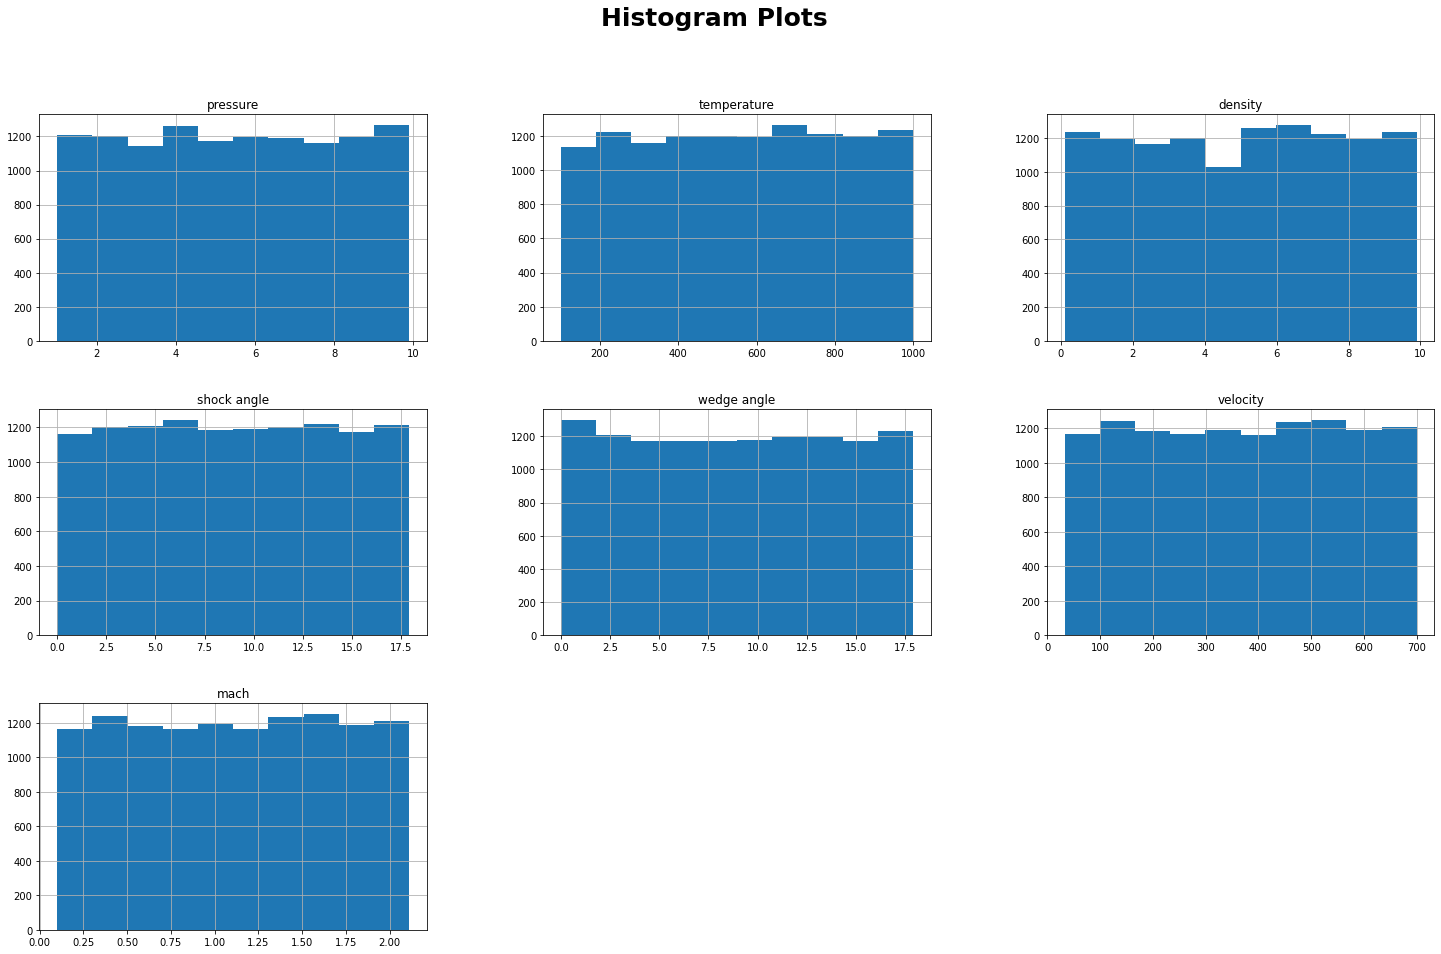

In [ ]:
fig = plt.figure(figsize=(25, 15))
ax = fig.gca()
df.hist(ax=ax)
fig.suptitle('Histogram Plots', fontsize=25, fontweight ="bold")
fig.show()

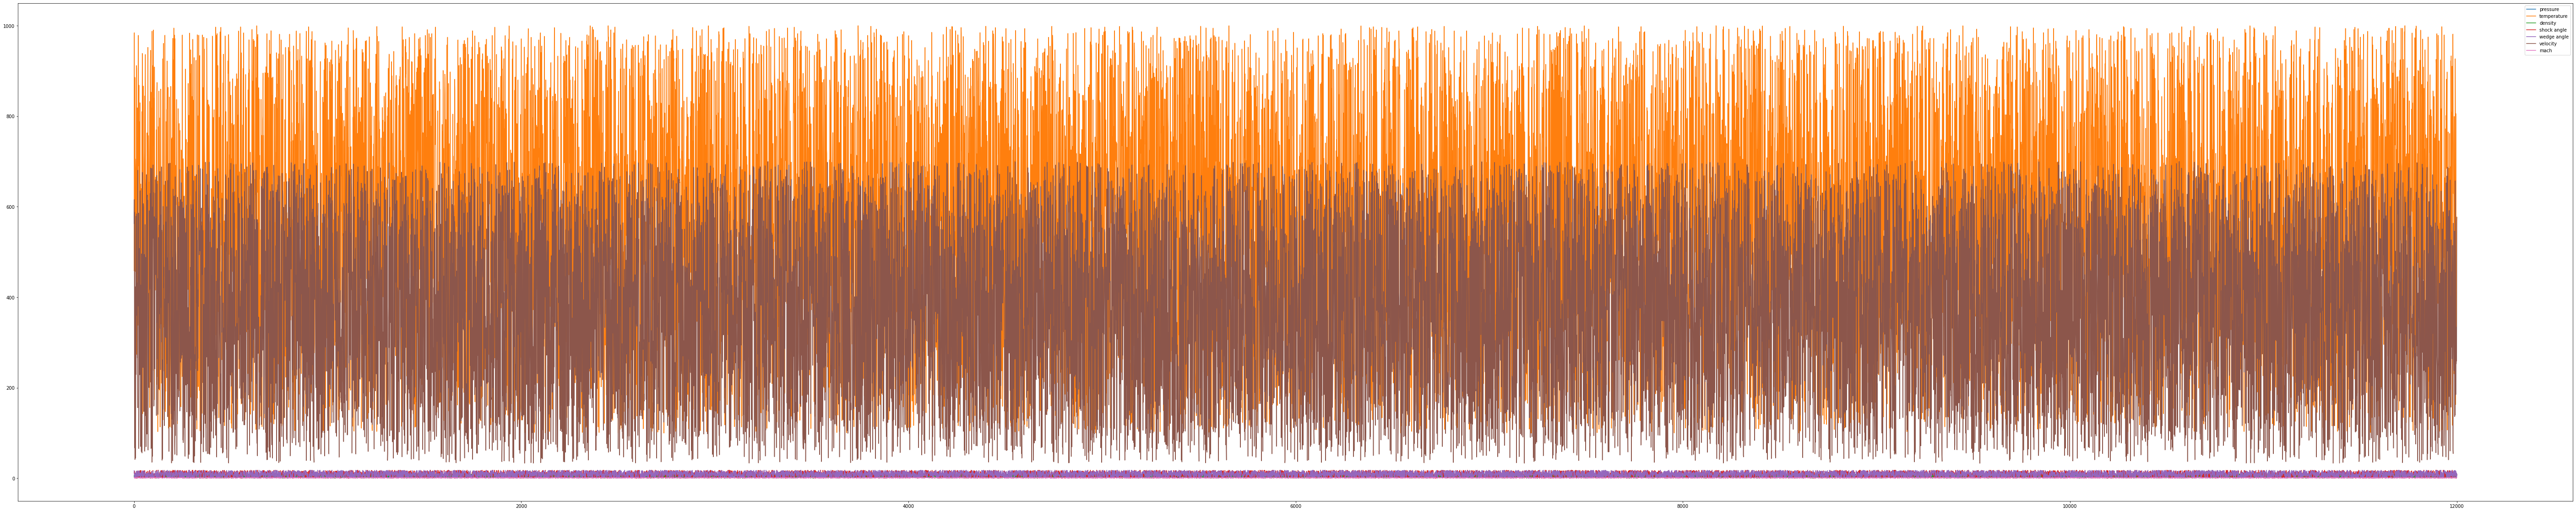

In [ ]:
fig = plt.figure(figsize=(100,20))
ax = fig.gca()
df.plot(ax=ax)
plt.show()

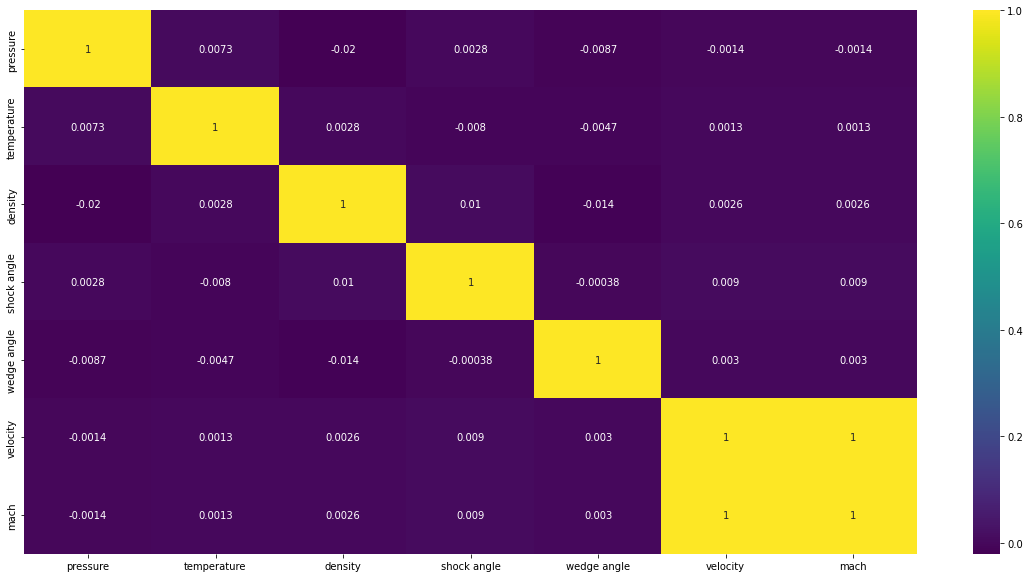

In [ ]:
df_heatmap = df.copy()
plt.figure(figsize=(20,10))
sns.heatmap(df_heatmap.corr(),cmap='viridis',annot=True)

## Preprocessing

Cube-root Transformation

In [ ]:
df['temperature'] = np.cbrt(df['temperature'])

Square-root Transformation

In [ ]:
df['velocity'] = np.cbrt(df['velocity'])

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler(feature_range=(0, 10))

In [ ]:
df.drop('id', axis = 1, inplace = True)

Label-Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

After Preprocessing

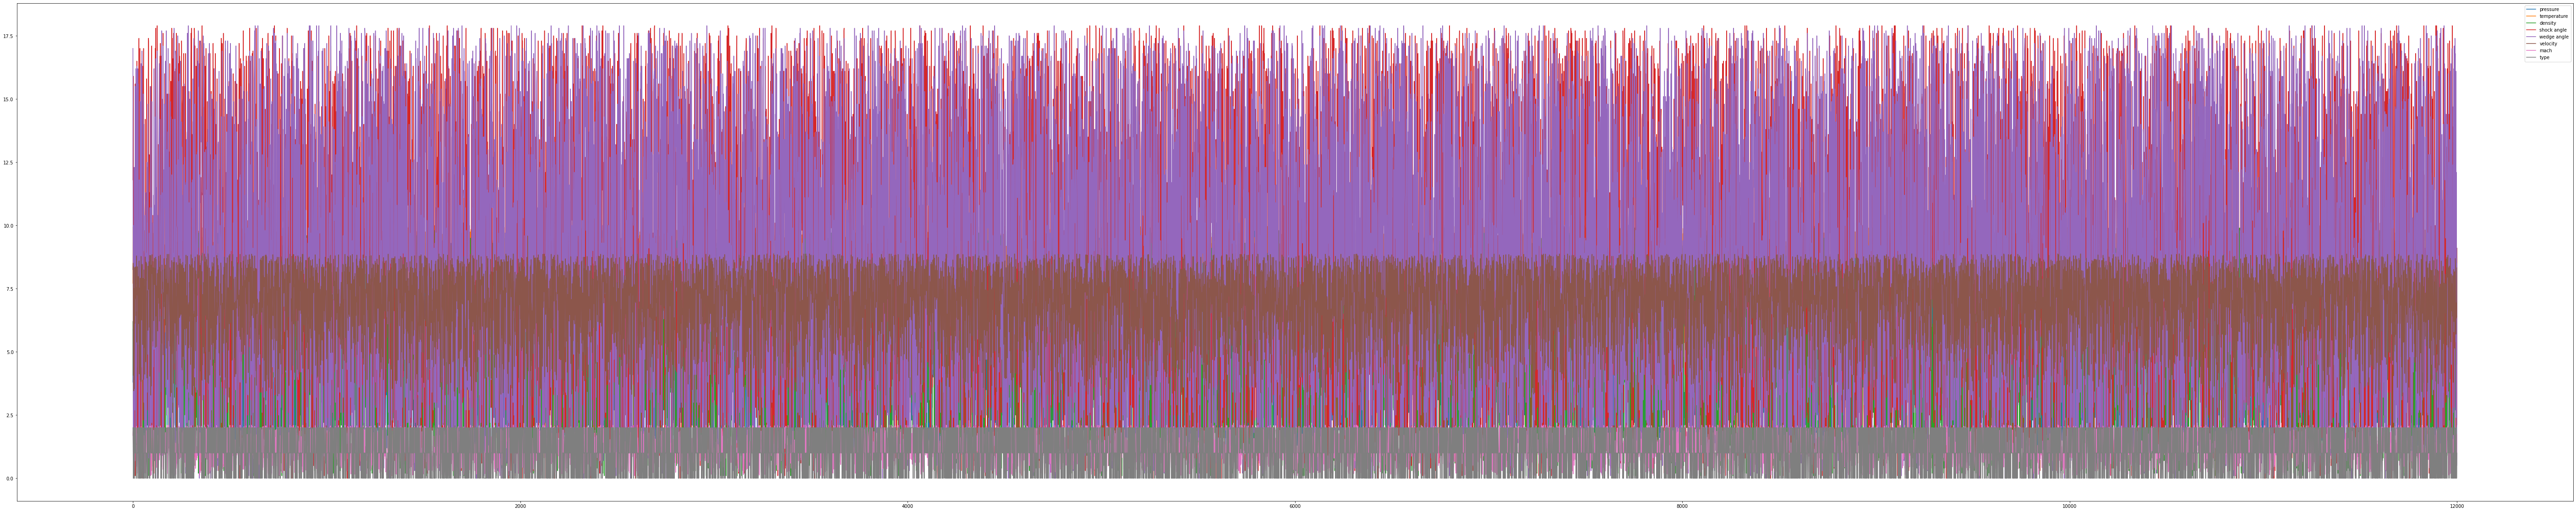

In [ ]:
fig = plt.figure(figsize=(100,20))
ax = fig.gca()
df.plot(ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


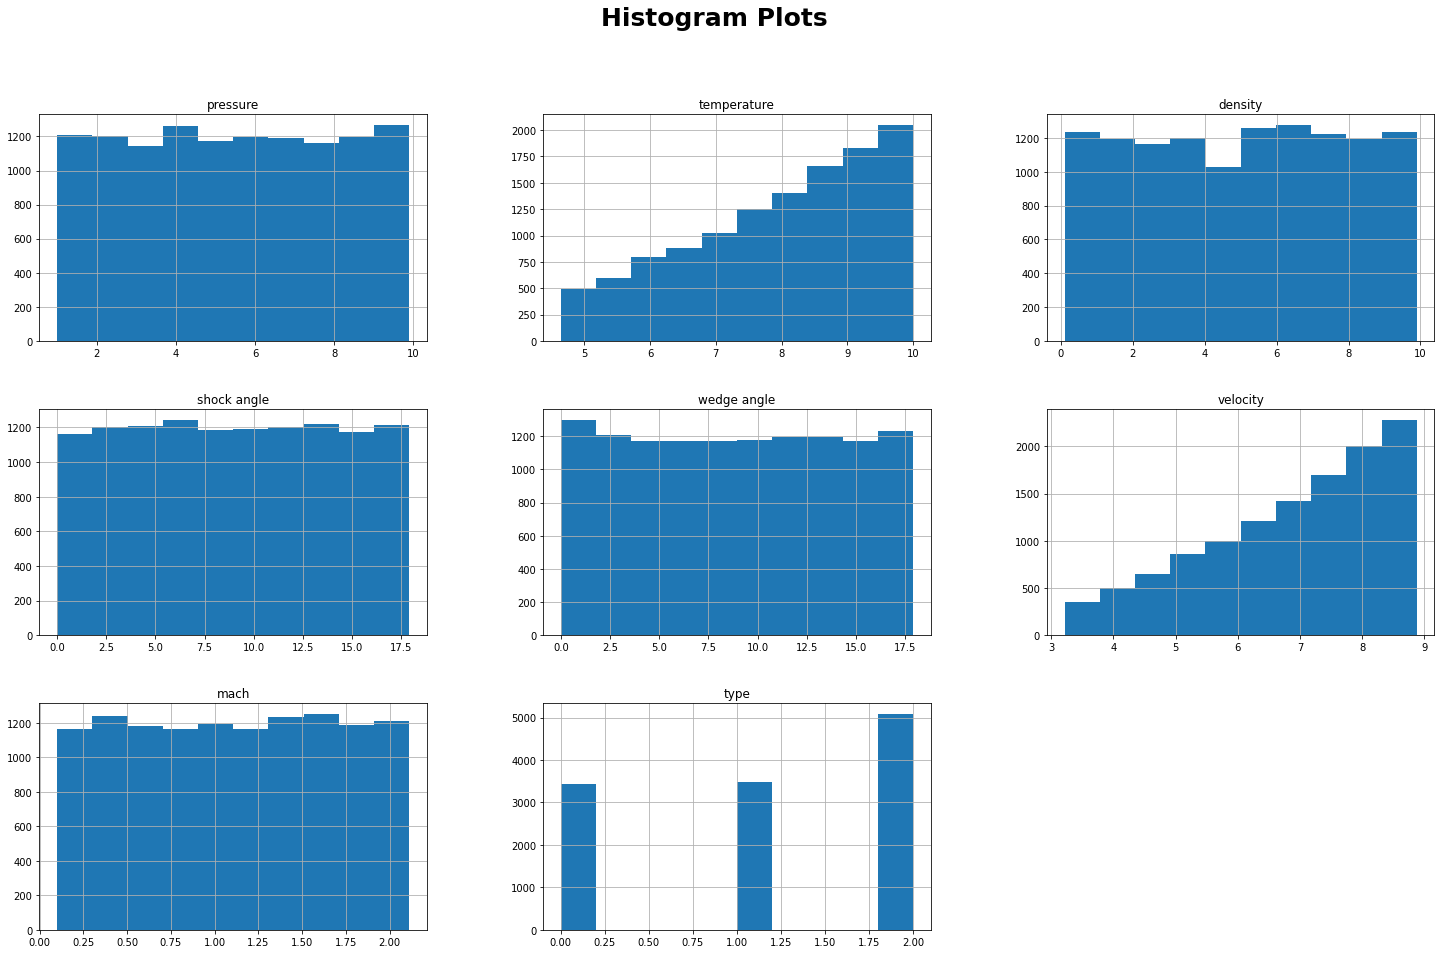

In [ ]:
fig = plt.figure(figsize=(25, 15))
ax = fig.gca()
df.hist(ax=ax)
fig.suptitle('Histogram Plots', fontsize=25, fontweight ="bold")
fig.show()

## Splitting Data into Train and Test

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=71)

## ***Classification***

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### K-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 2, 2, ..., 1, 0, 2])

Metrics

In [ ]:
print(
    f"Classification report for KNN - Classifier {knn}:\n"
    f"{classification_report(y_test, y_pred_knn)}\n"
)

Classification report for KNN - Classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1049
           1       0.80      0.90      0.85      1033
           2       0.93      0.84      0.88      1518

    accuracy                           0.86      3600
   macro avg       0.86      0.87      0.86      3600
weighted avg       0.87      0.86      0.86      3600




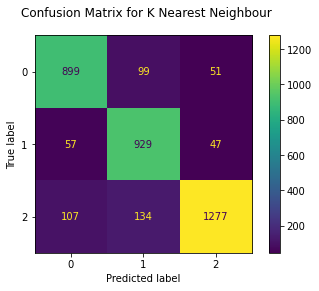

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
disp.figure_.suptitle("Confusion Matrix for K Nearest Neighbour")
plt.show()

### Naïve Bayes Classifier

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
y_pred_nb

array([1, 2, 2, ..., 1, 0, 2])

Metrics

In [ ]:
print(
    f"Classification report for Naïve Bayes {nb}:\n"
    f"{classification_report(y_test, y_pred_nb)}\n"
)

Classification report for Naïve Bayes GaussianNB():
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1049
           1       0.92      0.99      0.95      1033
           2       0.98      0.92      0.95      1518

    accuracy                           0.96      3600
   macro avg       0.95      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600




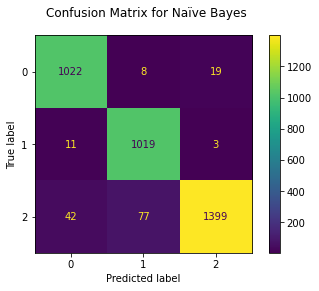

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
disp.figure_.suptitle("Confusion Matrix for Naïve Bayes")
plt.show()

### Random-Forest Classifier

In [ ]:
rf = RandomForestClassifier(criterion = 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 2, 2, ..., 1, 2, 2])

In [ ]:
print(
    f"Classification report for Random Forest Classifier {rf}:\n"
    f"{classification_report(y_test, y_pred_rf)}\n"
)

Classification report for Random Forest Classifier RandomForestClassifier(criterion='entropy'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1049
           1       0.99      0.99      0.99      1033
           2       0.99      0.99      0.99      1518

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600




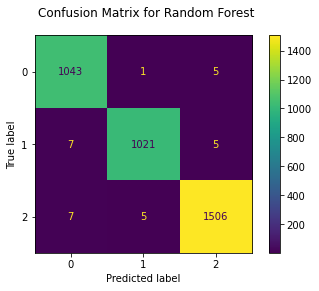

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
disp.figure_.suptitle("Confusion Matrix for Random Forest")
plt.show()